In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

data=pd.read_csv(r'C:\Users\vmffl\workspace\우리은행 데이터경진대회 데이터셋\우리은행 데이터경진대회 데이터셋.csv',index_col=0)
data.shape


(119535, 93)

In [15]:
data.head()

,TARGET,J_F1_LON_RK_3M_CNT_RE,J_F1_OTHER_LON_6M_AVBL_AM_RE,J_F1_OTHER_LON_MAX_3M_AM_RE,J_SHINBO_GIBO_AM_RE,J_TOT_LON_CNT_RE,J_TOT_LON_AGG_AM_RE,J_TOT_LON_MAX_AM_RE,J_DPS_CT_BAL_AM_RE,J_TOT_DPS_1M_AVBL_AM_RE,...,P_BR_CNTC_1M_CNT_RE,P_BR_CNTC_6M_CNT_RE,P_ATM_CNTC_6M_CNT_RE,P_INT_CNTC_6M_CNT_RE,P_TOT_LON_CNT_RE,P_TOT_LON_AGG_AM_RE,P_TOT_TS_6M_CNT_RE,P_TOT_TS_6M_AM_RE,P_OB_TS_6M_CNT_RE,P_OB_TS_6M_AM_RE
1,0,2,3,4,1,2,3,3,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,1,2,3,1,1,1,1,3,3,...,1,3,3,1,1,1,3,3,3,3
3,0,2,3,4,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,3,3,4,1,4,4,4,1,1,...,3,3,3,1,3,3,1,1,1,1
5,0,3,3,4,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119535 entries, 1 to 119535
Data columns (total 93 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   TARGET                        119535 non-null  int64
 1   J_F1_LON_RK_3M_CNT_RE         119535 non-null  int64
 2   J_F1_OTHER_LON_6M_AVBL_AM_RE  119535 non-null  int64
 3   J_F1_OTHER_LON_MAX_3M_AM_RE   119535 non-null  int64
 4   J_SHINBO_GIBO_AM_RE           119535 non-null  int64
 5   J_TOT_LON_CNT_RE              119535 non-null  int64
 6   J_TOT_LON_AGG_AM_RE           119535 non-null  int64
 7   J_TOT_LON_MAX_AM_RE           119535 non-null  int64
 8   J_DPS_CT_BAL_AM_RE            119535 non-null  int64
 9   J_TOT_DPS_1M_AVBL_AM_RE       119535 non-null  int64
 10  J_TOT_DPS_6M_AVBL_AM_RE       119535 non-null  int64
 11  J_CORE_DPS_1M_AVBL_AM_RE      119535 non-null  int64
 12  J_CORE_DPS_6M_AVBL_AM_RE      119535 non-null  int64
 13  J_TOT_DPS_ACC_

INT 자료형을 CATEGORICAL 자료형으로 변환. 서열척도라고 판단해서 원핫코딩 및 더미코딩을 진행하지 않았음

In [35]:
for col_name in data.columns:
    data[col_name]=pd.Categorical(data[col_name])

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119535 entries, 1 to 119535
Data columns (total 93 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   TARGET                        119535 non-null  category
 1   J_F1_LON_RK_3M_CNT_RE         119535 non-null  category
 2   J_F1_OTHER_LON_6M_AVBL_AM_RE  119535 non-null  category
 3   J_F1_OTHER_LON_MAX_3M_AM_RE   119535 non-null  category
 4   J_SHINBO_GIBO_AM_RE           119535 non-null  category
 5   J_TOT_LON_CNT_RE              119535 non-null  category
 6   J_TOT_LON_AGG_AM_RE           119535 non-null  category
 7   J_TOT_LON_MAX_AM_RE           119535 non-null  category
 8   J_DPS_CT_BAL_AM_RE            119535 non-null  category
 9   J_TOT_DPS_1M_AVBL_AM_RE       119535 non-null  category
 10  J_TOT_DPS_6M_AVBL_AM_RE       119535 non-null  category
 11  J_CORE_DPS_1M_AVBL_AM_RE      119535 non-null  category
 12  J_CORE_DPS_6M_AVBL_AM_RE      

타겟 변수에 1 비율이 매우 낮음. 데이터의 불균형이 심각함.

In [40]:
data['TARGET'].value_counts()

0    118720
1       815
Name: TARGET, dtype: int64

In [44]:
data['TARGET'].value_counts(normalize = True)

0    0.993182
1    0.006818
Name: TARGET, dtype: float64

<AxesSubplot:>

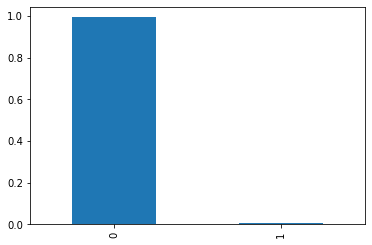

In [43]:
data['TARGET'].value_counts(normalize=True).plot(kind='bar')

In [47]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data,test_size=0.2, random_state=100)
print(train_data.shape)
print(test_data.shape)

(95628, 93)
(23907, 93)


In [52]:
train_data['TARGET'].value_counts()

0    94969
1      659
Name: TARGET, dtype: int64

In [53]:
test_data['TARGET'].value_counts()

0    23751
1      156
Name: TARGET, dtype: int64

In [54]:
print(train_data['TARGET'].value_counts()/train_data['TARGET'].shape[0]*100)

0    99.310871
1     0.689129
Name: TARGET, dtype: float64


In [55]:
print(test_data['TARGET'].value_counts()/test_data['TARGET'].shape[0]*100)

0    99.347471
1     0.652529
Name: TARGET, dtype: float64


In [73]:
X_trn=train_data.iloc[:,2:]
y_trn=train_data['TARGET']
X_tes=test_data.iloc[:,2:]
y_tes=test_data['TARGET']

SMOTEN 을 이용해서 TRAINING DATA를 오버샘플링

In [68]:
from imblearn.over_sampling import SMOTEN
smoten = SMOTEN()
X_trn_over, y_trn_over = smoten.fit_resample(X_trn,y_trn)

0과 1의 갯수가 같아진 것을 확인할 수 있다.

In [70]:
y_trn_over.value_counts()

0    94969
1    94969
Name: TARGET, dtype: int64

In [72]:
X_trn_over.shape

(189938, 91)

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.linear_model import LogisticRegression

def get_eval(y_test,pred=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    precision2=precision_score(y_test,pred,pos_label=0)
    recall2=recall_score(y_test,pred,pos_label=0)
    f1_2=f1_score(y_test,pred,pos_label=0)
    print("confusion matrix")
    print(confusion)
    print('accuracy : {0:.4f} , precision : {1:.4f} , recall : {2:.4f}, F1 score : {3:.4f} \n precision(0) : {4:.4f} , recall(0) : {5:.4f}, f1(0) : {6:.4f}'.format(accuracy,precision, recall,f1,precision2,recall2,f1_2))



비율이 현저히 적은 0 에 대해선 아주 낮은 PRECISION과 RECALL을 보여줌.  데이터의 불균형에 의한 문제. 
문제는 SMOTEN을 이용해 오버샘플링한 TRAINING DATA로 학습시킨 모델도 갖은 성능을 보임.

In [90]:
clf=LogisticRegression()
clf.fit(X_trn,y_trn)
pred=clf.predict(X_tes)
get_eval(y_tes,pred)

confusion matrix
[[23750     1]
 [  155     1]]
accuracy : 0.9935 , precision : 0.5000 , recall : 0.0064, F1 score : 0.0127 
 precision(0) : 0.9935 , recall(0) : 1.0000, f1(0) : 0.9967


C:\Users\vmffl\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
clf2=LogisticRegression()
clf2.fit(X_trn_over,y_trn_over)
pred2=clf.predict(X_tes)
get_eval(y_tes,pred2)

confusion matrix
[[23750     1]
 [  155     1]]
accuracy : 0.9935 , precision : 0.5000 , recall : 0.0064, F1 score : 0.0127 
 precision(0) : 0.9935 , recall(0) : 1.0000, f1(0) : 0.9967


C:\Users\vmffl\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Text(279.0, 380.52, 'X[53] <= 1.5\ngini = 0.014\nsamples = 95628\nvalue = [94969, 659]'),
 Text(139.5, 271.8, 'X[60] <= 2.5\ngini = 0.003\nsamples = 86157\nvalue = [86007, 150]'),
 Text(69.75, 163.07999999999998, 'X[12] <= 2.5\ngini = 0.001\nsamples = 59529\nvalue = [59497, 32]'),
 Text(34.875, 54.360000000000014, 'gini = 0.0\nsamples = 52973\nvalue = [52960, 13]'),
 Text(104.625, 54.360000000000014, 'gini = 0.006\nsamples = 6556\nvalue = [6537, 19]'),
 Text(209.25, 163.07999999999998, 'X[81] <= 1.5\ngini = 0.009\nsamples = 26628\nvalue = [26510, 118]'),
 Text(174.375, 54.360000000000014, 'gini = 0.007\nsamples = 24144\nvalue = [24062, 82]'),
 Text(244.125, 54.360000000000014, 'gini = 0.029\nsamples = 2484\nvalue = [2448, 36]'),
 Text(418.5, 271.8, 'X[48] <= 3.5\ngini = 0.102\nsamples = 9471\nvalue = [8962, 509]'),
 Text(348.75, 163.07999999999998, 'X[74] <= 2.5\ngini = 0.132\nsamples = 4714\nvalue = [4379, 335]'),
 Text(313.875, 54.360000000000014, 'gini = 0.116\nsamples = 4065\nvalu

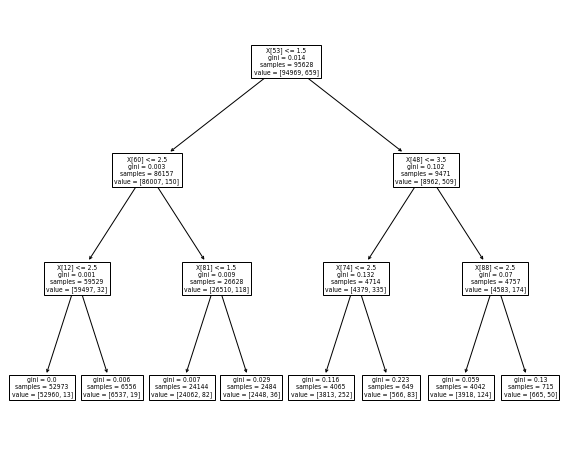

In [96]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
t1=DecisionTreeClassifier(max_depth=3)
t1.fit(X_trn,y_trn)
fig=plt.figure(figsize=(10,8))
tree.plot_tree(t1)